In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#  Coffee Price of Arabica Spieces 

In [25]:
coffee_price_arabica = pd.read_csv('../Data/Raw/global_price_of_coffee_arabica.csv')

coffee_price_arabica.head()

,DATE,PCOFFOTMUSDM
0,1990-01-01,75.829987
1,1990-02-01,84.010010
2,1990-03-01,93.959991
3,1990-04-01,93.730011
4,1990-05-01,92.019989


In [26]:
# Change DATE to datetime dtype
coffee_price_arabica['DATE'] = pd.to_datetime(coffee_price_arabica['DATE'])
# Filter to only the year 
coffee_price_arabica['Years'] = coffee_price_arabica['DATE'].dt.year

# Groupby Year to average the respective months of coffee prices
average_price_by_year = coffee_price_arabica.groupby('Years')['PCOFFOTMUSDM'].mean().round(2)

# Reset index
coffee_price_arabica = average_price_by_year.reset_index()

# Change name of PCOFFOTMUSDM
coffee_price_arabica_df = coffee_price_arabica.rename(columns={'PCOFFOTMUSDM':'Global Price of Arabica Coffee (US cents per a lb)'})

# Filter to years between 1990-2017 in alignment with other datasets
coffee_price_arabica_df = coffee_price_arabica_df[(coffee_price_arabica_df['Years'] >= 1990) & (coffee_price_arabica_df['Years'] <= 2017)]

# Convert US cents per a lb
coffee_price_arabica_df['Global Price of Arabica Coffee (US cents per a lb)'] = coffee_price_arabica_df['Global Price of Arabica Coffee (US cents per a lb)'] / 100

coffee_price_arabica_df


,Years,Global Price of Arabica Coffee (US cents per a lb)
0,1990,0.8915
1,1991,0.8503
2,1992,0.6174
3,1993,0.7112
4,1994,1.4735
5,1995,1.5083
6,1996,1.2197
7,1997,1.8893
8,1998,1.3547
9,1999,1.0388


###  Arabica Analysis

In [27]:
# Mean vs median
arabica_mean = coffee_price_arabica_df['Global Price of Arabica Coffee (US cents per a lb)'].mean()
arabica_median = coffee_price_arabica_df['Global Price of Arabica Coffee (US cents per a lb)'].median()

# Lowest and highest price of Arabica coffee 
arabica_min_index = coffee_price_arabica_df['Global Price of Arabica Coffee (US cents per a lb)'].idxmin()
lowest_price_year = coffee_price_arabica_df.loc[arabica_min_index,'Years']
lowest_price = coffee_price_arabica_df.loc[arabica_min_index, 'Global Price of Arabica Coffee (US cents per a lb)']

arabica_max_index = coffee_price_arabica_df['Global Price of Arabica Coffee (US cents per a lb)'].idxmax()
highest_price_year = coffee_price_arabica_df.loc[arabica_max_index,'Years']
highest_price = coffee_price_arabica_df.loc[arabica_max_index, 'Global Price of Arabica Coffee (US cents per a lb)']

print(f'The average price of Arabica coffee from 1990-2023 is ${round(arabica_mean,0)} US cents per a lb')
print(f'The median price of Arabica coffee from 1990-2023 is ${round(arabica_median,0)} US cents per a lb')
print(f'The lowest price of Arabica coffee was ${lowest_price} in {lowest_price_year} US cents per a lb.')
print(f'The highest price of Arabica coffee was ${highest_price} in {highest_price_year} US cents per a lb.')



The average price of Arabica coffee from 1990-2023 is $1.0 US cents per a lb
The median price of Arabica coffee from 1990-2023 is $1.0 US cents per a lb
The lowest price of Arabica coffee was $0.6146 in 2002 US cents per a lb.
The highest price of Arabica coffee was $2.7111 in 2011 US cents per a lb.


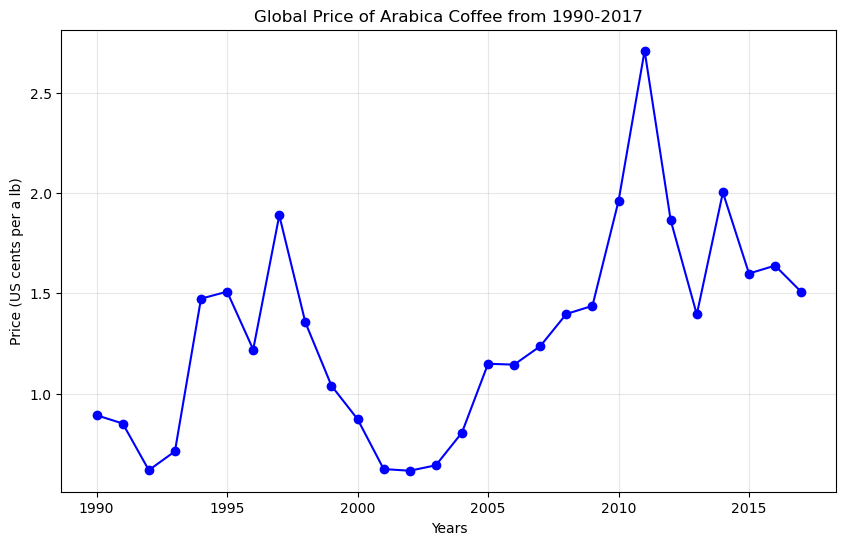

In [28]:
# Plot Arabica
plt.figure(figsize=(10, 6))
plt.plot(coffee_price_arabica_df['Years'], coffee_price_arabica_df['Global Price of Arabica Coffee (US cents per a lb)'], marker='o', color='blue')

plt.title('Global Price of Arabica Coffee from 1990-2017')
plt.xlabel('Years')
plt.ylabel('Price (US cents per a lb)')
plt.grid(True, alpha=0.3)

# Save fig
plt.savefig('../Visuals/coffee_prices/fig1_price_arabica.png')

plt.show()

# Coffee Price of Robusta Spieces 

In [29]:
coffee_price_robusta = pd.read_csv('../Data/Raw/global_price_of_coffee_robusta.csv')
coffee_price_robusta

,DATE,PCOFFROBUSDM
0,1990-01-01,50.520000
1,1990-02-01,51.299999
2,1990-03-01,57.680000
3,1990-04-01,57.389999
4,1990-05-01,55.029999
...,...,...
402,2023-07-01,127.583333
403,2023-08-01,124.356522
404,2023-09-01,123.891429
405,2023-10-01,118.835000


In [30]:
# Change DATE to datetime dtype
coffee_price_robusta['DATE'] = pd.to_datetime(coffee_price_robusta['DATE'])
# Filter to only the year 
coffee_price_robusta['Years'] = coffee_price_robusta['DATE'].dt.year

# Groupby Year to average the respective months of coffee prices
average_price_by_year = coffee_price_robusta.groupby('Years')['PCOFFROBUSDM'].mean().round(2)

# Reset index
coffee_price_robusta = average_price_by_year.reset_index()

# Change name of PCOFFROBUSDM
coffee_price_robusta_df = coffee_price_robusta.rename(columns={'PCOFFROBUSDM':'Global Price of Robusta Coffee (US cents per a lb)'})

# Filter to years between 1990-2017 in alignment with other datasets
coffee_price_robusta_df = coffee_price_robusta_df[(coffee_price_robusta_df['Years'] >= 1990) & (coffee_price_robusta_df['Years'] <= 2017)]

# Convert US cents per a lb
coffee_price_robusta_df['Global Price of Robusta Coffee (US cents per a lb)'] = coffee_price_robusta_df['Global Price of Robusta Coffee (US cents per a lb)'] / 100

coffee_price_robusta_df


,Years,Global Price of Robusta Coffee (US cents per a lb)
0,1990,0.5499
1,1991,0.4983
2,1992,0.4222
3,1993,0.5255
4,1994,1.1724
5,1995,1.2556
6,1996,0.8196
7,1997,0.7867
8,1998,0.8272
9,1999,0.6765


### Robusta Analysis

In [31]:
# Mean vs Median
robusta_mean = coffee_price_robusta_df['Global Price of Robusta Coffee (US cents per a lb)'].mean()
robusta_median = coffee_price_robusta_df['Global Price of Robusta Coffee (US cents per a lb)'].median()

# Lowest and highest price of Arabica coffee 
robusta_min_index = coffee_price_robusta_df['Global Price of Robusta Coffee (US cents per a lb)'].idxmin()
lowest_price_year = coffee_price_robusta_df.loc[robusta_min_index,'Years']
lowest_price = coffee_price_robusta_df.loc[robusta_min_index, 'Global Price of Robusta Coffee (US cents per a lb)']

robusta_max_index = coffee_price_robusta_df['Global Price of Robusta Coffee (US cents per a lb)'].idxmax()
highest_price_year = coffee_price_robusta_df.loc[robusta_max_index,'Years']
highest_price = coffee_price_robusta_df.loc[robusta_max_index, 'Global Price of Robusta Coffee (US cents per a lb)']

print(f'The average price of Robusta coffee from 1990-2023 is ${round(arabica_mean,0)} US cents per a lb')
print(f'The median price of Robusta coffee from 1990-2023 is ${round(arabica_median,0)} US cents per a lb')
print(f'The lowest price of Robusta coffee was ${lowest_price} in {lowest_price_year} US cents per a lb.')
print(f'The highest price of Robusta coffee was ${highest_price} in {highest_price_year} US cents per a lb.')


The average price of Robusta coffee from 1990-2023 is $1.0 US cents per a lb
The median price of Robusta coffee from 1990-2023 is $1.0 US cents per a lb
The lowest price of Robusta coffee was $0.2759 in 2001 US cents per a lb.
The highest price of Robusta coffee was $1.2556 in 1995 US cents per a lb.


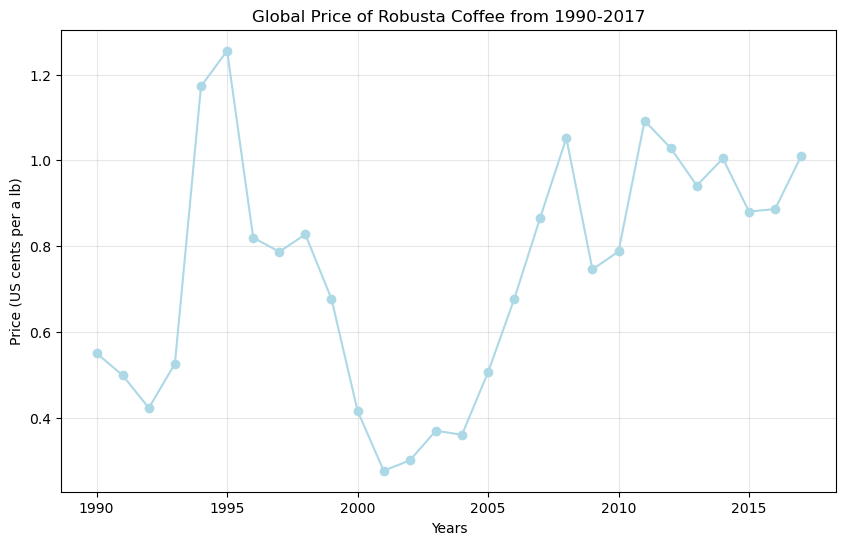

In [32]:
# Plot robusta
plt.figure(figsize=(10, 6))
plt.plot(coffee_price_robusta_df['Years'], coffee_price_robusta_df['Global Price of Robusta Coffee (US cents per a lb)'], marker='o', color='lightblue')

plt.title('Global Price of Robusta Coffee from 1990-2017')
plt.xlabel('Years')
plt.ylabel('Price (US cents per a lb)')
plt.grid(True, alpha=0.3)

# Save fig
plt.savefig('../Visuals/coffee_prices/fig2_price_robusta.png')

plt.show()

In [33]:
# Merge the two datasets
coffee_prices = pd.merge(coffee_price_arabica_df, coffee_price_robusta_df, on='Years')

coffee_prices

,Years,Global Price of Arabica Coffee (US cents per a lb),Global Price of Robusta Coffee (US cents per a lb)
0,1990,0.8915,0.5499
1,1991,0.8503,0.4983
2,1992,0.6174,0.4222
3,1993,0.7112,0.5255
4,1994,1.4735,1.1724
5,1995,1.5083,1.2556
6,1996,1.2197,0.8196
7,1997,1.8893,0.7867
8,1998,1.3547,0.8272
9,1999,1.0388,0.6765


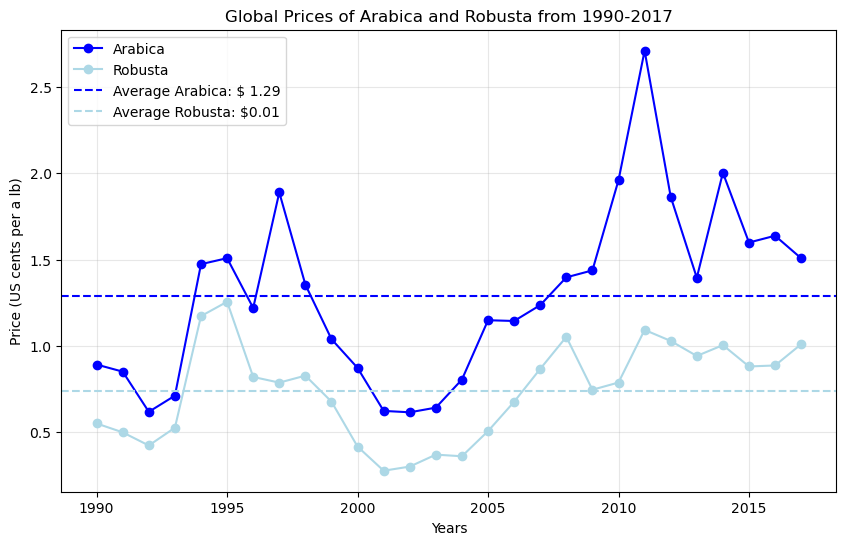

In [34]:
plt.figure(figsize=(10, 6))
# Plot arabica and robusta lines
plt.plot(coffee_prices['Years'], coffee_prices['Global Price of Arabica Coffee (US cents per a lb)'], marker='o', color='blue', label='Arabica')
plt.plot(coffee_prices['Years'], coffee_prices['Global Price of Robusta Coffee (US cents per a lb)'], marker='o', color='lightblue', label='Robusta')

# Plot average lines
plt.axhline(y=arabica_mean, color='blue', linestyle='--', label=(f'Average Arabica: ${arabica_mean: .2f}'))
plt.axhline(y=robusta_mean, color='lightblue', linestyle='--', label=(f'Average Robusta: ${robusta_mean/100:.2f}'))

# Titles and labels
plt.title('Global Prices of Arabica and Robusta from 1990-2017')
plt.xlabel('Years')
plt.ylabel('Price (US cents per a lb)')
plt.legend()
plt.grid(True, alpha=0.3)

# Save fig
plt.savefig('../Visuals/coffee_prices/fig3_arabica_robusta_price.png')

plt.show()

From 1990-2023, the average price of Arabica and Robusta coffee beans is $138.09 and $76.80 US cents per a lb respectively. Arabica coffee has been historically more expensive than Robusta. With the lowest price in 2002 at $61.46 US cents per a lb and the highest price in 2011 at $271.11 US cents per a lb. Robusta lowest price was at $ 27.51 US cents per a lb in 2001 and the highest at $125.56 US cents per a lb in 1995. Both Arabica and Robusta saw a dramatic decrease in price starting at the end of the 1990s which bottoms out in 2002 and a gradual rise in price into 2006 with expotential growth in price for Aracbica in 2011.

In [35]:
# Save to .csv in cleaned folder
coffee_prices.to_csv('../Data/Cleaned/coffee_prices.csv')